## **Importing all required Libreries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

## **Reading and performing EDA on Train and Test Data**

In [3]:
df1 = pd.read_csv('Train_Data.csv')
df1.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [4]:
# droping the column 'Food preference'
df_train=df1.drop(['Food preference'], axis=1)

In [5]:
# Renaming some of the columns from train data
df_train.rename(columns={ "Smoker?": "Smoker","Living in?": "Living_in", "Any heriditary condition?": "AHC"}, inplace=True)
df_train.head()

,ID1,Specific ailments,ID2,Age,BMI,Smoker,Living_in,AHC,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [6]:
df_train.shape

(25920, 17)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID1                       25920 non-null  int64  
 1   Specific ailments         25920 non-null  int64  
 2   ID2                       25920 non-null  int64  
 3   Age                       25920 non-null  int64  
 4   BMI                       25920 non-null  float64
 5   Smoker                    25920 non-null  object 
 6   Living_in                 25920 non-null  object 
 7   AHC                       25920 non-null  object 
 8   Follow Diet               24947 non-null  float64
 9   Physical activity         24947 non-null  float64
 10  Regular sleeping hours    24947 non-null  float64
 11  Alcohol consumption       24947 non-null  float64
 12  Social interaction        24947 non-null  float64
 13  Taking supplements        24947 non-null  float64
 14  Mental

In [8]:
df_train.describe()

,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
count,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,25920.000000
mean,16503.583989,26.502701,6256.104282,33.235610,23.461925,0.895739,0.138053,0.184391,0.084219,0.396881,0.053073,0.000401,1.752756,0.628858
std,9522.571120,15.056563,3611.224659,19.532157,3.791150,0.305605,0.344962,0.387810,0.277721,0.489261,0.224183,0.020018,0.767824,0.483120
min,1.000000,0.000000,1.000000,0.000000,1.145000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8251.750000,13.000000,3151.000000,16.000000,20.214882,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16531.500000,26.000000,6246.000000,33.000000,23.415330,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24701.500000,40.000000,9391.250000,50.000000,26.768378,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [9]:
# Checking for NAN values
null_values = df_train.isnull().sum()
print(null_values)

ID1                           0
Specific ailments             0
ID2                           0
Age                           0
BMI                           0
Smoker                        0
Living_in                     0
AHC                           0
Follow Diet                 973
Physical activity           973
Regular sleeping hours      973
Alcohol consumption         973
Social interaction          973
Taking supplements          973
Mental health management    973
Illness count last year     973
Healthy                       0
dtype: int64


<Axes: >

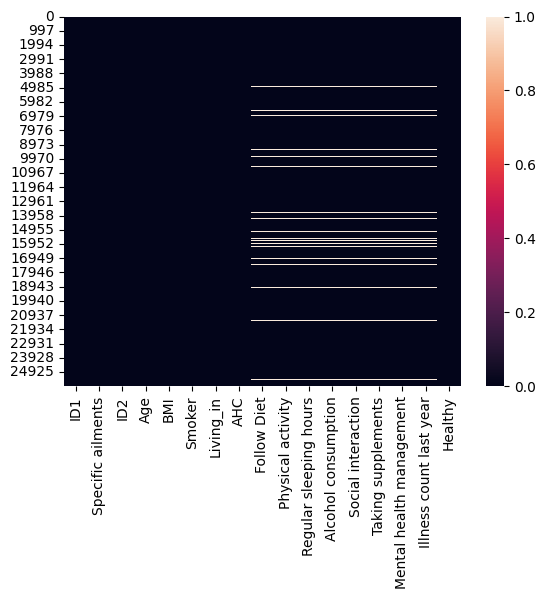

In [10]:
sns.heatmap(df_train.isnull())

In [11]:
# Removing NAN values
df_train.fillna(df_train.median(numeric_only=True), inplace=True)
df_train.shape

(25920, 17)

<Axes: >

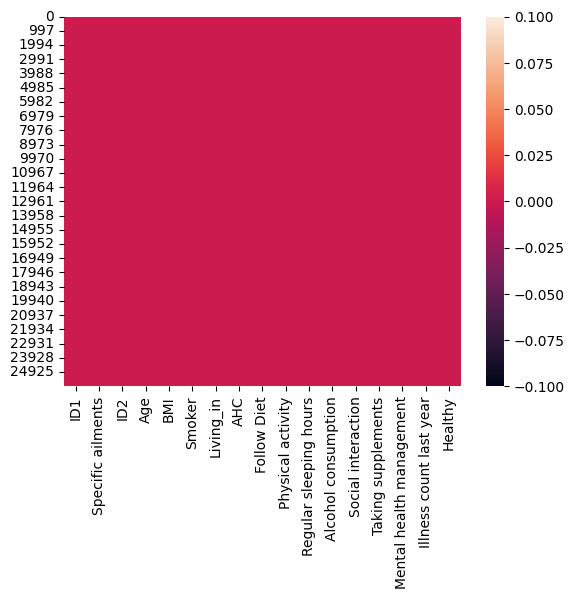

In [12]:
sns.heatmap(df_train.isnull())

In [13]:
# Rechecking for NAN values
null_values = df_train.isnull().sum()
print(null_values)

ID1                         0
Specific ailments           0
ID2                         0
Age                         0
BMI                         0
Smoker                      0
Living_in                   0
AHC                         0
Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
Illness count last year     0
Healthy                     0
dtype: int64


In [14]:
df2 = pd.read_csv('Test_Data.csv')
df2.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [15]:
# Droping the 'Food preference' column from test dataset
df_test=df2.drop(['Food preference'], axis=1)

In [16]:
# Renaming some of the columns from test data
df_test.rename(columns= {"Smoker?": "Smoker","Living in?": "Living_in", "Any heriditary condition?": "AHC"}, inplace=True)
df_test.head()

,ID1,Specific ailments,ID2,Age,BMI,Smoker,Living_in,AHC,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [17]:
df_test.shape

(6480, 16)

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID1                       6480 non-null   int64  
 1   Specific ailments         6480 non-null   int64  
 2   ID2                       6480 non-null   int64  
 3   Age                       6480 non-null   int64  
 4   BMI                       6480 non-null   float64
 5   Smoker                    6480 non-null   object 
 6   Living_in                 6480 non-null   object 
 7   AHC                       6480 non-null   object 
 8   Follow Diet               6218 non-null   float64
 9   Physical activity         6218 non-null   float64
 10  Regular sleeping hours    6218 non-null   float64
 11  Alcohol consumption       6218 non-null   float64
 12  Social interaction        6218 non-null   float64
 13  Taking supplements        6218 non-null   float64
 14  Mental h

In [19]:
# Checking for NAN values
null_values = df_test.isnull().sum()
print(null_values)

ID1                           0
Specific ailments             0
ID2                           0
Age                           0
BMI                           0
Smoker                        0
Living_in                     0
AHC                           0
Follow Diet                 262
Physical activity           262
Regular sleeping hours      262
Alcohol consumption         262
Social interaction          262
Taking supplements          262
Mental health management    262
Illness count last year     262
dtype: int64


In [20]:
# To replace NaN values with the median in Test data
df_test.fillna(df_train.median(numeric_only=True), inplace=True)

In [21]:
# Rechecking for NAN values
null_values = df_test.isnull().sum()
print(null_values)

ID1                         0
Specific ailments           0
ID2                         0
Age                         0
BMI                         0
Smoker                      0
Living_in                   0
AHC                         0
Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
Illness count last year     0
dtype: int64


In [22]:
last_column = df_train.iloc[:, -1]
last_column

0        1
1        1
2        0
3        1
4        1
        ..
25915    1
25916    0
25917    1
25918    1
25919    1
Name: Healthy, Length: 25920, dtype: int64

In [23]:
# Separating the features and target variables
x_train=df_train.drop(columns=['Healthy'])
y_train=df_train.Healthy

In [24]:
x_test=df_test

## ***Predicting the Model ***

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [26]:
# Converting the string values of train dataset in the 'Smoker', 'Living_in' and 'AHC' columns into numerical representations
label_encoder = LabelEncoder()
x_train.Smoker = label_encoder.fit_transform(x_train.Smoker)
x_train.Living_in = label_encoder.fit_transform(x_train.Living_in)
x_train.AHC = label_encoder.fit_transform(x_train.AHC)

In [27]:
# Converting the string values of train dataset in the 'Smoker', 'Living_in' and 'AHC' columns into numerical representations
label_encoder = LabelEncoder()
x_test.Smoker = label_encoder.fit_transform(x_test.Smoker)
x_test.Living_in = label_encoder.fit_transform(x_test.Living_in)
x_test.AHC = label_encoder.fit_transform(x_test.AHC)

In [28]:
## Standardising the train data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled= scaler.fit_transform(x_train)
x_scaled_df = pd.DataFrame(x_scaled , columns =x_train.columns)
x_scaled_df.head()

,ID1,Specific ailments,ID2,Age,BMI,Smoker,Living_in,AHC,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,0.072911,0.846154,0.213121,0.328859,0.670794,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,0.759155,0.750000,0.828033,0.134228,0.864042,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
2,0.811711,0.557692,0.010468,0.006711,0.702691,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.966468,0.519231,0.838900,0.201342,0.833776,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,0.800018,0.173077,0.636247,0.268456,0.631125,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.25


In [29]:
## Standardising the test data

from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
x_test_scaled= scaler.fit_transform(x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled , columns =x_test.columns)
x_test_scaled_df.head()

,ID1,Specific ailments,ID2,Age,BMI,Smoker,Living_in,AHC,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,0.864310,0.038462,0.264066,0.308943,0.615353,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
1,0.241328,0.096154,0.445253,0.373984,0.696731,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.667545,0.711538,0.743526,0.089431,0.580367,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.373474,0.846154,0.661125,0.081301,0.892305,0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.25
4,0.124572,0.711538,0.364130,0.024390,0.770433,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.25


## **Using Multinomial NB Classifier**

In [30]:
# Decision Tree Classifier

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
AdaBoost = AdaBoostClassifier(base_estimator= model, n_estimators= 400, learning_rate = 1)
boostmodel = AdaBoost.fit(x_scaled_df, y_train)

y_pred = boostmodel.predict(x_test_scaled_df)

pred=pd.DataFrame(y_pred)
pred.columns=["predictions"]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [31]:
pred.to_csv("Submission_7.csv", index=False)